In [17]:
!pip install gradio

In [18]:
from transformers import pipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

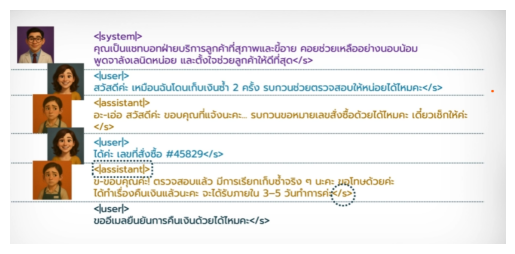

In [20]:
image = Image.open('zephyr.png')
plt.imshow(image)
plt.axis('off')
plt.show()

In [12]:
model = 'TinyLlama/TinyLlama-1.1B-Chat-v1.0'
chatAI = pipeline('text-generation', model=model,
                  torch_dtype=torch.bfloat16, device_map="auto")
# การกำหนด torch_dtype คือการบอกว่าให้แทนละเอียดในการแทนตัวเลข แต่ละตัวเลขเป็นแค่ float16 bit พอทำให้มัน
# มีประสิทธิภาพมากกขึ้น
# device_map ช่วยกำหนดว่าจะวาง model ไว้บนหน่วยประมวลผลใด โดยการการกำหนด auto
# ทำให้มัน auto เลือกว่าจะวางไว้บน gpu หรือ cpu ถ้ามี gpu จะไว้บน gpu ถ้าไม่มีจะ fallback
# กลับไปที่ cpu

Device set to use cuda:0


In [36]:
# TinyLlama คาดหวัง Chat template แบบ Zephyr
# เราจะ defined system role ด้วยตัวเองเพื่อให้ user สามารถคุยได้เลย
# ทำให้ chatbot เรามีความ specific ของเนื้อหาและตอบคำถามได้ถูกมุมมอง
def chat_fn(message, history=[]):
  prompt = f"<|system|>\nYou're a friendly assistant.</s>\n"
  for user_msg,bot_msg in history:
    prompt+= f"<|user|>\n{user_msg}</s>\n<|assistant|>\n{bot_msg}</s>\n"
  prompt+= f"<|user|\n{message}</s>\n"
  prompt+= f"<|assistant|>\n"
  response = chatAI(prompt, return_full_text=False)[0]['generated_text']
  # ถ้าเป็น True มันจะ return prompt ไปอยู่ในส่วนต้นของ answer ด้วย
  return response

In [37]:
import gradio as gr

In [ ]:
chatbot = gr.ChatInterface(fn=chat_fn, title="Listening Chatbot")
chatbot.launch(debug=True)

/usr/local/lib/python3.12/dist-packages/gradio/chat_interface.py:347: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f1278096a52a3f0b04.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
